This project is about developing a supervised learning model on a genomic dataset. The dataset contains data about patients admitted in hospitals to treat COVID-19 cases. Some patients had a mild infection, while others had a severe one. The goal of this project is to build a supervised learning model to predict severe COVID-19 hospital admissions by using the genome sequencing of patients as predictors.

## 1. Data Processing



1. Importing of some of the libraries needed for the project
2. Data was collected and imported into this environment using pandas.
3. The column "sample" was dropped. It is not needed for this project because it doesnt improve the outcome and also takes away any form of personalization
4. Sex and Severity data was converted to binary form for data uniformity(All numerical data)
5. The dataset was printed out to view the result after some data processing has been done
6. Data was checked for missing values so columns with a level of missing values can be dropped to reduce dimensionality.
7. X and Y was defined for the training and test process
8.Structure of X was viewed and examined ensure it meets my required standard
9.Structure of Y was viewed and examined to ensure it meets my required standard
10.The dataset X was printed out to view the result after some data processing has been done
11.The dataset Y was printed out to view the result after some data processing has been done

In [1]:
import numpy as np #imports the library numpy
import matplotlib.pyplot as plt #imports the library matplotlib for visualization
import pandas as pd #imports the library numpy for working with dataframes
import math

In [2]:
#Here we are loading our dataset as an csv file
covid_data = pd.read_csv("covid_data.csv")
covid_data.head()


,Sample,Age,Sex,Severity,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,C1,39,male,NonICU,0.49,0.00,0.21,0.04,0.07,0.0,...,2.84,4.22,0.95,1.63,15.51,0.06,8.17,363.01,19.17,6.05
1,C2,63,male,NonICU,0.29,0.00,0.14,0.00,0.00,0.0,...,3.55,12.15,0.60,1.15,15.62,0.14,8.20,399.80,15.72,4.12
2,C3,33,male,NonICU,0.26,0.00,0.03,0.02,0.00,0.0,...,1.34,2.79,0.18,0.32,17.67,0.28,3.62,430.35,13.95,1.81
3,C4,49,male,NonICU,0.45,0.01,0.09,0.07,0.00,0.0,...,3.71,5.87,1.40,2.21,15.61,0.27,7.88,209.25,14.78,7.15
4,C5,49,male,NonICU,0.17,0.00,0.00,0.05,0.07,0.0,...,1.44,4.46,0.28,0.55,9.34,0.07,5.96,272.91,8.69,2.70


In [3]:
#The column "sample" was dropped. It is not needed for this project because it doesnt improve the outcome and also takes away any form of personalization
covid_data.drop('Sample', inplace=True, axis=1)

In [4]:
covid_data['Severity'] = covid_data['Severity'].map({'NonICU':1,'ICU':0}) #Changing objects to binary
covid_data['Sex'] = covid_data['Sex'].map({'male':0,'female':1,'unknown':2})

In [5]:
#It is a high dimensional data since the number of features is greater than the number of observations
covid_data.head()


,Age,Sex,Severity,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,39,0,1,0.49,0.00,0.21,0.04,0.07,0.0,0.03,...,2.84,4.22,0.95,1.63,15.51,0.06,8.17,363.01,19.17,6.05
1,63,0,1,0.29,0.00,0.14,0.00,0.00,0.0,0.05,...,3.55,12.15,0.60,1.15,15.62,0.14,8.20,399.80,15.72,4.12
2,33,0,1,0.26,0.00,0.03,0.02,0.00,0.0,0.07,...,1.34,2.79,0.18,0.32,17.67,0.28,3.62,430.35,13.95,1.81
3,49,0,1,0.45,0.01,0.09,0.07,0.00,0.0,0.00,...,3.71,5.87,1.40,2.21,15.61,0.27,7.88,209.25,14.78,7.15
4,49,0,1,0.17,0.00,0.00,0.05,0.07,0.0,0.00,...,1.44,4.46,0.28,0.55,9.34,0.07,5.96,272.91,8.69,2.70


In [6]:
#This was done to see if the dataset has missing values and to also drop columns with the most missing values to help reduce dimensionality but we have zero missing values in the dataset
covid_data.isna().sum().sum()

0

In [7]:
#This block separates features (X) from outcomes (y)
X = covid_data.drop('Severity', axis=1) 
y = covid_data['Severity']

In [8]:
X.shape #To view the data structure of X
#It is a high dimensional data since the number of features is greater than the number of observations

(126, 19474)

In [9]:
y.shape #To view the data structure of y

(126,)

In [10]:
X.head() #To view the first five data in X and confirm it is in the required format

,Age,Sex,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,39,0,0.49,0.00,0.21,0.04,0.07,0.0,0.03,18.92,...,2.84,4.22,0.95,1.63,15.51,0.06,8.17,363.01,19.17,6.05
1,63,0,0.29,0.00,0.14,0.00,0.00,0.0,0.05,18.68,...,3.55,12.15,0.60,1.15,15.62,0.14,8.20,399.80,15.72,4.12
2,33,0,0.26,0.00,0.03,0.02,0.00,0.0,0.07,13.85,...,1.34,2.79,0.18,0.32,17.67,0.28,3.62,430.35,13.95,1.81
3,49,0,0.45,0.01,0.09,0.07,0.00,0.0,0.00,22.11,...,3.71,5.87,1.40,2.21,15.61,0.27,7.88,209.25,14.78,7.15
4,49,0,0.17,0.00,0.00,0.05,0.07,0.0,0.00,8.45,...,1.44,4.46,0.28,0.55,9.34,0.07,5.96,272.91,8.69,2.70


In [11]:
y.head() #To view the first five data in X and confirm it is in the required f

0    1
1    1
2    1
3    1
4    1
Name: Severity, dtype: int64

## 2. Training and tuning

Please note that PCA and reglarization was not included to reduce dimensionality because it didn't change the performance of the model.

12. The block below splits our dataset into training(80%) and testing(20%). We keep test data unseen so we can use later on to measure the performance of our model.

15. The shape of the X_train and y_test data was printed to see the splitting result

16.  The value count of Y train and test was checked to ensure there was a proper or close to eaqual split for the model to learn from.

17. Standardization was done for X for because the features of the iput data X have difference beteween their range(some columns have values as low as 0.1 and others as high as 430.35). Standardization was used to transform features to comparable scales before implementing SVM

18. SVM was one models used first to compare accuracries accross models before picking the best fit for the data. I decided to try linear SVM kernel because the data had a large number of features and it is linearly separable in high dimensional space.

19. Accuracy of all SVM kernel of the test data set was printed out for evaluation. I did not show to prediction reult and confusion matrix for this model because i ended up selecting logistic regression.

20. Creating tuning and validation data for k-cross validation before using Logistic regression. This was done to ensure that every observation in the dataset has chance to appearing because performs training 'k'number of time which gives a better insight.Tuning data is composed by 80% of data, the remaining 20% of data goes to the validation set.The variablerandom_state indicates the seed of the shuffling (for reproducibility reasons).

23. PIPELINE FOR IMPLEMENTING LOGISTIC REGRESSION

Standardisation of features:- Standardization was used to transform features to comparable scales before implementing logistic regression
Logistic regression was used since we were solving a binary classification problem.
Random Forest was also explored to further see the best model because it is a model good for datasets with numerous features
As for the logistic regression, we are using the LogisticRegression module from sklearn.linear_model. 

Some important parameters defined in the LogisticRegression module are:

C. Inverse of regularization strength; must be a positive float. Smaller values was used to specify stronger regularization.
Random_state was used reproducibility reasons.


In [12]:
#This block below splits our dataset into training(80%) and testing(20%). We keep test data unseen, so to later on measure the performance of our model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [13]:
X_train.shape #Features on training data contain 100 observations

(100, 19474)

In [14]:
y_test.shape #Features on test data contain 26 observations

(26,)

In [15]:
y_train.value_counts() #Feature on y train contains 51 ICU cases and 49 non-icu cases

1    51
0    49
Name: Severity, dtype: int64

In [16]:
y_test.value_counts()#Feature on y train contains 17 ICU cases and 9 non-icu cases

0    17
1     9
Name: Severity, dtype: int64

In [17]:
# Standardising  data
#Standardization was used to transform features to comparable scales before implementing SVM
from sklearn.preprocessing import StandardScaler # Library to standardise data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
    

In [18]:
#Import svm model
from sklearn import svm

#Create many svm Classifier, one classifier for each kernel
clf_lnr = svm.SVC(kernel='linear') # Linear Kernel
clf_ply = svm.SVC(kernel='poly') # Polynomial Kernel
clf_rbf = svm.SVC(kernel='rbf') # Radial Basis Function Kernel - Default value
clf_sgm = svm.SVC(kernel='sigmoid') # Sigmoid Kernel

#Train the model using the training sets
clf_lnr.fit(X_train, y_train)
clf_ply.fit(X_train, y_train)
clf_rbf.fit(X_train, y_train)
clf_sgm.fit(X_train, y_train)

#Predict the response for test dataset
pred_test_lnr = clf_lnr.predict(X_test)
pred_test_ply = clf_ply.predict(X_test)
pred_test_rbf = clf_rbf.predict(X_test)
pred_test_sgm = clf_sgm.predict(X_test)

In [19]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
#The accuracy on the linear kernel had the best result because our data is linearly separable.
print("Accuracy SVM (Linear Kernel):", metrics.accuracy_score(y_test, pred_test_lnr)) 
print("Accuracy SVM (Polynomial Kernel):", metrics.accuracy_score(y_test, pred_test_ply))
print("Accuracy SVM (Radial Kernel):", metrics.accuracy_score(y_test, pred_test_rbf))
print("Accuracy SVM (Sigmoid Kernel):", metrics.accuracy_score(y_test, pred_test_sgm))

Accuracy SVM (Linear Kernel): 0.8461538461538461
Accuracy SVM (Polynomial Kernel): 0.8076923076923077
Accuracy SVM (Radial Kernel): 0.8076923076923077
Accuracy SVM (Sigmoid Kernel): 0.8461538461538461


In [20]:
#Creating tuning and validation data for k-cross validation before using Logistic regression
#Splits our dataset into tuning and validation. We keep validation data unseen, so to later on measure the performance of our model.
from sklearn.model_selection import train_test_split

X_tuning, X_val, y_tuning, y_val = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [21]:
#This was done to ensure that every observation in the dataset has chance to appearing because it performs training 'k-1'number of time which gives a better insight
#K was used as 10 to make it sufficiently reliable to test my model
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10, shuffle=True, random_state=10)
kf.get_n_splits(X)

10

In [22]:
## For each alpha, perform k-fold cross validation
for train_index, test_index in kf.split(X_tuning):
        X_train, X_test = X_tuning.iloc[train_index], X_tuning.iloc[test_index]
        y_train, y_test = y_tuning.iloc[train_index], y_tuning.iloc[test_index]

In [24]:

from sklearn.preprocessing import StandardScaler # Library to standardise data
from sklearn.linear_model import LogisticRegression # Library to use Logistic Regression
from sklearn.ensemble import RandomForestClassifier # Library to use Random Forest
from sklearn.pipeline import Pipeline # Library to create a pipeline
from time import time 

start = time()

# Defining different pipelines

pipe = Pipeline([('scaler', StandardScaler()), # scaling features
                     ('logreg', LogisticRegression(C=1, random_state=5))]) # logistic regression
rndf_clf = RandomForestClassifier(oob_score=True, random_state=10) # no need to scale features for random forest

# Implementing our pipelines
pipe.fit(X_train, y_train)
rndf_clf.fit(X, y) # no need to use train-test in Random Forest, we are using the oob_score



print("This took %0.3fs" % (time() - start))

This took 2.262s


## 3. Model validation



28. I decided to use  logistic regression model because it gives a good confusion matrix and classification result compared to random forest.From the results it can be observed that there is only one misclassification for ICU cases and 1 misclassification for NonICU cases

29. Precision is intuitively the ability of the classifier not to label as positive a sample that is negative and Logistic regression performed well for both NonICU(1) and ICU(0) cases
The recall is intuitively the ability of the classifier to find all the positive samples Logistic regression also performed well for both NonICU(1) and ICU(0) cases

In [28]:
#The accuracy of Logistic regrassion and random forest is printed out in this block
from sklearn.metrics import accuracy_score

print("Logistic - Accuracy on train:", accuracy_score(lreg_train.actual, lreg_train.fitted))
print("Logistic - Accuracy on test:", accuracy_score(lreg_test.actual, lreg_test.fitted))

print(" - ")
print("Random Forest - Accuracy on train:", accuracy_score(rndf_train.actual, rndf_train.fitted))
print("Random Forest - Accuracy on test:", rndf_clf.oob_score_) # the oob_score from random forest

Logistic - Accuracy on train: 1.0
Logistic - Accuracy on test: 0.8
 - 
Random Forest - Accuracy on train: 1.0
Random Forest - Accuracy on test: 0.8015873015873016


In [29]:
#From the results it can be observed that there is only one misclassification for ICU cases and 1 misclassification for NonICU cases
#Precision is intuitively the ability of the classifier not to label as positive a sample that is negative and Logistic regression performed well for both NonICU(1) and ICU(0) cases
#The recall is intuitively the ability of the classifier to find all the positive samples Logistic regression also performed well for both NonICU(1) and ICU(0) cases
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(lreg_test.actual, lreg_test.fitted)
print(cm)
print(classification_report(lreg_test.actual, lreg_test.fitted))
#This block below computes the precision, recall, f-score, macro and weighted average for each class of test data where 1 = Nonicu and 0 = ICU

[[3 1]
 [1 5]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.83      0.83      0.83         6

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10



In [30]:
#Our accuracy is 0.80, which is a big jump from the value we would get from a dummy classifier.
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
DummyClassifier(strategy='most_frequent')
dummy_clf.score(X, y)


0.5238095238095238

In [31]:
#Pipeline used was for standardization and logistic regression
pipe[1].coef_

array([[0.00609459, 0.00212979, 0.00036623, ..., 0.00337328, 0.00237115,
        0.00011048]])

## 4. Model interpretation


The regression coefficient tells us if there is a positive or negative correlation between the independent variable and the dependent varable. 
The barplot below means that a negative change of ICU correspond to an increase of the probability of predicting a patients case as none 'Non-ICU' 

In [32]:
#Logistic regression works only on binomial variables.
#The result below shows the result for each observation
#The barplot below futher expains the interpretation
# ICU(1)  VS NONICU(0)
coef = pd.DataFrame({"value0": pipe[1].coef_[0]})
coef["beta"] = y

coef.head()

,value0,beta
0,0.006095,1.0
1,0.002130,1.0
2,0.000366,1.0
3,-0.001001,1.0
4,-0.000150,1.0


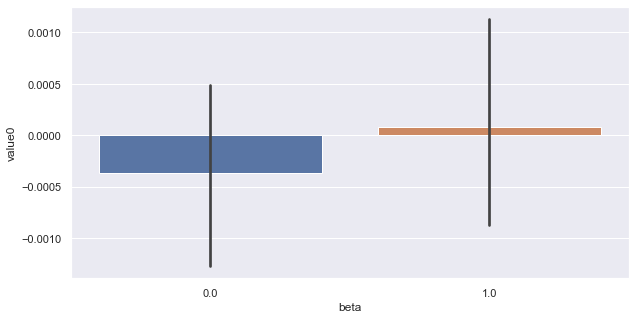

In [33]:
#The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable
#A negative coefficient suggests that as the independent variable(ICU) decreases, the dependent variable tends to increases(NON-ICU).
#The barplot below means that a negative change of ICU correspond to an increase of the probability of predicting a patients case as none 'Non-ICU'
import seaborn as sb
sb.set(rc={'figure.figsize':(10,5)})
sb.barplot(data = coef, x="beta", y="value0")


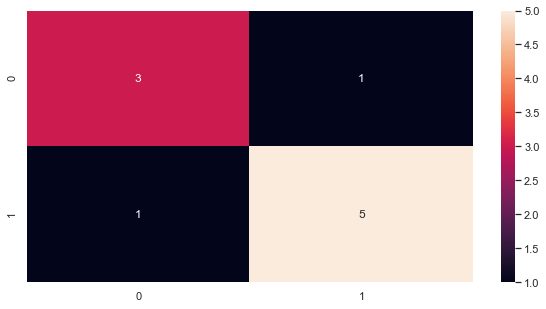

In [34]:
#From the results it can be observed that there is only one misclassification for ICU cases and 1 misclassification for NonICU cases  which means our model is a good prediction model.
import seaborn as sns
sns.heatmap(cm, annot=True)

## 5. Predictions


27. The resutls below show the actual values against the fitted(test data) ones and we see a high level of accuracy which menas our model is able to predict unseen data accurately

In [27]:
#Let's now see how our model peformed in train and test data.

#This block is associated with train and test data respectively.
#it shows the result of the  actual values against fitten ones.
lreg_train = pd.DataFrame({ "actual": y_train, "fitted": pipe.predict(X_train) })
lreg_test = pd.DataFrame({ "actual": y_test, "fitted": pipe.predict(X_test) })


rndf_train = pd.DataFrame({ "actual": y, "fitted": rndf_clf.predict(X) })

lreg_train.head()

,actual,fitted
82,0,0
17,1,1
97,0,0
31,0,0
45,0,0


In [38]:
#This shows the tail result of the actual values against the fitted ones
lreg_train.tail()

,actual,fitted
9,0,0
72,0,0
12,1,1
107,0,0
37,0,0


## 6. Discussion


Let's define a pipeline as follow:

Standardization was done for X for because the features of the iput data X have difference beteween their range(some columns have values as low as 0.1 and others as high as 430.35). Standardization was used to transform features to comparable scales before implementing SVM

SVM was one models used first to compare accuracries accross models before picking the best fit for the data. I decided to try linear SVM kernel because the data had a large number of features and it is linearly separable in high dimensional space.Accuracy of all SVM kernel of the test data set was printed out for evaluation. I did not show to prediction result and confusion matrix for SVM because i ended up selecting logistic regression.

Creating tuning and validation data for k-cross validation before using Logistic regression. This was done to ensure that every observation in the dataset has chance to appearing because performs training 'k'number of time which gives a better insight.Tuning data is composed by 80% of data, the remaining 20% of data goes to the validation set.The variable random_state indicates the seed of the shuffling for reproducibility reasons

LOGISTIC REGRESSION
As for the logistic regression, we are using the LogisticRegression module from sklearn.linear_model.

Standardisation of features:- Standardization was used to transform features to comparable scales before implementing logistic regression
Logistic regression was used since we were solving a binary classification problem.
Random Forest was also explored to further see the best model because it is a model good for datasets with numerous features

Some important parameters defined in the LogisticRegression module are:

C. Inverse of regularization strength; must be a positive float.Smaller values specify stronger regularization which is why i used 1.
Random_state was used reproducibility reasons.

From the results it can be observed that there is only 1 misclassification for ICU cases and 1 misclassification for NonICU cases with Logistic regression and the accuracy of training to test set was excellent

Also the prediction result(actual and fitted) on unseen data shows linear regression performs well on the unseen data.

The limitation of my chosen model is that it has a very high probability of ignoring outliers in the data and it is not always the best model for a dataset with way more features than observations.

ALternatively, SVM is a second option to solve the given machine learning question.

## 7. Complexity



In [ ]:
It took my chosen machne learning model 2.262s to run
Logistic Regression

Train Time Complexity=O(n*m)
Test Time Complexity=O(m)
Space Complexity = O(m)
n = number of training examples, m = number of features


Overall time complexity = T(n) = n - 1